# 3 多次元正規分布

これまでみてきた正規分布は、確率変数が一つであった。今回は、複数の確率変数を持つ多次元正規分布についてみていく。

本ステップでは、はじめに、ベクトルや行列の復習を行い、多次元正規分布を対象に、可視化や最尤推定の方法について学ぶ。

## 3.1 numpyと多次元配列

ベクトルや、行列が多く登場するため、復習を行う。

### 3.1.1 多次元配列

多次元配列は、複数の要素をまとめて扱うためのデータ構造である。要素の並びには方向があり、次元や軸と呼ばれる。

０次元配列 

$1$

１次元配列 

$\begin{pmatrix} 1\\ 2\\ 3\end{pmatrix}$

2次元配列 

$\begin{pmatrix} 1&2\\ 3&4\\ 5&6\end{pmatrix}$

それぞれ、スカラ、ベクトル、行列とも呼ばれる。行列は、二つの軸に沿って要素が並ぶ。横方向の並びを行、縦方向の並びを列という。
また、行列の形を行と列の要素の数で３行2列の行列と呼び、$3\times 2$の行列と表記する。

ベクトルは、一つの軸に沿って要素が並ぶが、二つの方法で表現される。

列ベクトル $\begin{pmatrix} 1\\ 2\\ 3\end{pmatrix}$

行ベクトル $\begin{pmatrix} 1 & 2& 3\end{pmatrix}$

本書ではベクトルは列ベクトルとして扱います。ベクトルや行列は太字を使用して$\boldsymbol{x},\boldsymbol{W}$などの表記を用いて表現する。
要素が3つあるベクトルを３次元ベクトルと呼ぶ。また、三次元配列は要素の軸が３つある配列のことを言う。


### 3.1.2 NumPyの多次元配列

NumPyを使用してベクトルや行列を作成する。

In [1]:
import numpy as np
x = np.array([1, 2, 3])

print("クラス名 :",x.__class__)
print("形状   　:"  ,x.shape)
print("次元数  :" ,x.ndim)

クラス名 : <class 'numpy.ndarray'>
形状   　: (3,)
次元数  : 1


上記で示したように、np.array()を使用することで、ベクトルや行列を作成することができる。二次元配列の場合は

In [2]:
W = np.array([[1, 2, 3],
              [4, 5, 6]])
print("次元：",W.ndim)
print("形状：",W.shape)

次元： 2
形状： (2, 3)


上の結果から、Wが二次元の配列であり、$2\times3$の行列であることがわかる。

### 3.1.3 要素ごとの演算

行列を使用した、簡単な演算を行う。まずは、要素ごとの演算についてです。

In [3]:
W = np.array([[1, 2, 3],[4, 5, 6]])
x = np.array([[0, 1, 2],[3, 4, 5]])

print("W + x\n",W + x)
print('---------------')
print("W * x\n",W * x)

W + x
 [[ 1  3  5]
 [ 7  9 11]]
---------------
W * x
 [[ 0  2  6]
 [12 20 30]]


同じ形状の多次元配列に対して四則演算が行われている。この場合、各要素で独立して演算が行われる。

行列では、内積や外積があるが、ここで行っている積は、アブノーマル積とも呼ばれる。

### 3.1.4 ベクトルの内積と行列積（外積）

ここでは要素数が$D$である二つのベクトル$\boldsymbol{x}, \boldsymbol{y}$を扱う。

$$\boldsymbol{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_D \end{pmatrix}$$

$$\boldsymbol{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_D \end{pmatrix}$$

この時、ベクトルの内積(スカラー積)は、
$$ \boldsymbol{x}\cdot \boldsymbol{y} = x_1y_1 + x_2y_2+\cdots +x_Dy_D = \sum^D_{n=1} x_ny_n$$

と表すことができる。続いて、行列積（ベクトル積）は、$n\times n$の正方行列$\boldsymbol{A},\boldsymbol{B}$

$$ \boldsymbol{A} = \begin{pmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n}\\
                                    \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \cdots & a_{nn}\end{pmatrix}$$

$$ \boldsymbol{B} = \begin{pmatrix} b_{11} & b_{12} & \cdots & b_{1n} \\ b_{21} & b_{22} & \cdots & b_{2n}\\
                                    \vdots & \vdots & \ddots & \vdots \\ b_{n1} & b_{n2} & \cdots & b_{nn}\end{pmatrix}$$

を用いて、以下のように計算される。

$$ \boldsymbol{A} \times \boldsymbol{B} = \begin{pmatrix} \sum^n_{i=0} a_{1i}b_{i1} & \sum^n_{i=0} a_{1i}b_{i2} & \cdots & \sum^n_{i=0} a_{1i}b_{in} \\
                                                          \sum^n_{i=0} a_{2i}b_{i1} & \sum^n_{i=0} a_{2i}b_{i2} & \cdots & \sum^n_{i=0} a_{2i}b_{in} \\
                                                          \vdots                    & \vdots                    & \ddots & \vdots \\
                                                          \sum^n_{i=0} a_{ni}b_{in} & \sum^n_{i=0} a_{ni}b_{in} & \cdots & \sum^n_{i=0} a_{ni}b_{in} \\
                                                          \end{pmatrix}$$

行列積の結果は、$n\times n$の行列になる。

次に、ベクトルの内積と行列積を実装する。

In [4]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

y = np.dot(a, b)
print("ベクトルの内積\n",y)

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print("行列積\n",Y)

ベクトルの内積
 32
行列積
 [[19 22]
 [43 50]]


同様の結果を$@$を使用することで計算することができる。

In [5]:
print("ベクトルの内積\n", a @ b)
print("行列積\n", A @ B)

ベクトルの内積
 32
行列積
 [[19 22]
 [43 50]]


正方行列以外の形状の場合、必ずしも行列積が定義できるわけではない。行列積を定義するためには、行列$\boldsymbol{A}, \boldsymbol{B}$の形状がそれぞれ$m\times n, n\times l$のように、演算記号の前にある行列の要素数と、演算記号の後にある行列の行の要素数が一致している必要がある。そのため、$A\times B$は定義できるが、$B\times A$は定義することができない。また、行列積$A\times B$によって求められる行列の形状は、$m\times l$となる。

## 3.2 多次元正規分布

前ステップで確認した正規分布は一つの実数値（スカラ）の分布を対象にした。次に、ベクトルに関する正規分布について考える。例えば、身長と体重を次のように一つのベクトルとして考える。

$$ \boldsymbol{x}=\begin{pmatrix} \rm{hight} \\ \rm{weight} \end{pmatrix}$$

このベクトルからなるデータ分布を正規分布で表す。

### 3.2.1 多次元正規分布

ここでは次の確率変数$\boldsymbol{x}$を対象にする。

$$\boldsymbol{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_D \end{pmatrix}$$

この$x_n$は同じ分布からの独立したサンプルではない。$\boldsymbol{x}$の各要素は互いに関連するデータである。

この時、$\boldsymbol{x}$に関する正規分布は、次の式で表される。

$$\mathcal{N}(\boldsymbol{x};\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^2|\Sigma|}}\exp{-\frac{1}{2}(x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})}$$

転置や、逆行列の操作については後ほど説明する。$\boldsymbol{\mu}$は平均ベクトル、$\Sigma$は共分散行列と呼ばれる。

$$\boldsymbol{\mu} = \begin{pmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_D \end{pmatrix}$$

$$\boldsymbol{\Sigma} = \begin{pmatrix} \sigma_{11} & \sigma_{12} & \cdots & \sigma_{1D} \\
                                        \sigma_{21} & \sigma_{22} & \cdots & \sigma_{2D} \\
                                        \vdots      & \vdots      & \ddots & \vdots \\
                                        \sigma_{D1} & \sigma_{D2} & \cdots & \sigma_{DD} \\
                                        \end{pmatrix}$$
                                        
今回はD次元のデータが対象で、平均ベクトル$\mu$は要素数がD個のベクトルで、共分散行列$\Sigma$は$D\times D$の行列になり、対角成分は各変数の分散を表し、非対角成分は共分散を表す。例えば、確率変数$x_i$の分散は、$\sigma_{ii}$である。また、$\sigma_{ij}$は$x_i$と$x_j$の二つの変数の関係性を表す。

続いて、多次元正規分布の式で使用される4つの用語について補足する。

* 共分散
* 転置
* 行列式
* 逆行列

#### 共分散　(Covariance)

確率変数$x_i$の分散は

$$\rm{Var}[x_i] = \mathbb{E}[(x_i-\mu_i)^2]$$

確率変数$x_i,x_j$の共分散は$\rm{Cov}[x_i,x_j]$と表すこととし、

$$\rm{Cov}[x_i,x_j]=\mathbb{E}[(x_i-\mu_i)(x_j-\mu_j)]$$

で求めることができる。$i=j$の場合に共分散は分散と一致し、分散の一般化と見なすことができる。

つまり、共分散行列の各要素

$$\sigma_{ij} = \mathbb{E}[(x_i - \mu_i)(x_j - \mu_j)]$$

と表すことができる。

#### 転置 (Transpose)

$(\boldsymbol{x} - \boldsymbol{\mu})^\top$の$\top$は転置を意味する。

行列$\boldsymbol{A}$が次で示される時、

$$\boldsymbol{A} = \begin{pmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{pmatrix}$$

転置を行った$\boldsymbol{A}^\top$は

$$\boldsymbol{A}^\top = \begin{pmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{pmatrix}$$

と表される。

また、ベクトルの場合は、列ベクトルが行ベクトルに変化し

$$\begin{pmatrix} 1\\ 2\\ 3\\ \end{pmatrix}$$

の列ベクトルは

$$\begin{pmatrix} 1 & 2 & 3\end{pmatrix} $$

という行ベクトルになる。NumPyでは、.T属性を使用することで、転置を行うことができる。実際にコード例を見てみると

In [6]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
print("元のベクトル\n",A)
print("--------------")
print("転置ベクトル\n",A.T)

元のベクトル
 [[1 2 3]
 [4 5 6]]
--------------
転置ベクトル
 [[1 4]
 [2 5]
 [3 6]]


#### 行列式 (Determinant)

$|\Sigma|$は行列式を表す。正方行列の特徴を表す指標の一つで、計算結果はスカラをとる。

例として、$2\times2$の行列式を求める場合

$$ \boldsymbol{A} =\begin{pmatrix} a_{11}&a_{12} \\ a_{21} & a_{22} \end{pmatrix}$$

$$|\boldsymbol{A}| = a_{11}a_{22} - a_{12}a_{21} $$

となり、スカラであることがわかる。NumPyではnp.linalg.det関数を使用することで行列式を求めることができる。 linia algebraは線形代数を意味する。

In [7]:
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print("行列式の値\n",d)

行列式の値
 -2.0000000000000004


教科書と値が異なるが、おおよそ−２で一致している。

#### 逆行列　（Inverse Matrix）

$\boldsymbol{\Sigma}^{-1}$のように、行列の右上に$-1$がある場合、逆行列を意味する。

逆行列は、行列式が０でない場合にのみ存在し、元の行列との積が単位行列になる。つまり、
$$\boldsymbol{A}\boldsymbol{A}^{-1} = \boldsymbol{A}^{-1}\boldsymbol{A} = \boldsymbol{I}$$

$$I = \begin{pmatrix} 1 & 0 & \cdots & 0\\ 0 & 1 & \cdots & 0\\ \vdots & \vdots & \ddots & \vdots\\ 0 & 0 & \cdots & 0\end{pmatrix} $$

となる。

逆行列の計算の方法について$2\times2$の逆行列の計算方法を紹介する。

$$ \boldsymbol{A} = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} $$

の逆行列$\boldsymbol{A}^{-1}$は、

$$ \boldsymbol{A}^{-1} = \frac{1}{|\boldsymbol{A}|}\begin{pmatrix} a_{22} & -a_{12}\\ -a_{12} & a_{22} \end{pmatrix}$$

となる。NumPyでは、np.linalg.inv関数を使用することで、逆行列を求めることができる。

In [8]:
A = np.array([[3, 4],[5,6]])
B = np.linalg.inv(A)

print("逆行列\n", B)
print("-------------------")
print("AA^(-1)\n",A @ B)

逆行列
 [[-3.   2. ]
 [ 2.5 -1.5]]
-------------------
AA^(-1)
 [[ 1.00000000e+00  0.00000000e+00]
 [-1.77635684e-15  1.00000000e+00]]


### 3.2.2 多次元正規分布の実装

多次元正規分布の実装を行う。多次元正規分布の式は

$$\mathcal{N}(\boldsymbol{x};\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^2|\Sigma|}}\exp{-\frac{1}{2}(x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})}$$

である。コードは

In [9]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

と書くことができる。それぞれの引数は、ndarrayのインスタンスでありそれぞれの形状は

* x  : (1,D) or (D,)
* mu : (1,D) or (D,)
* cov: (D,D)

である。実際に上記の関数を使用すると

In [10]:
x = np.array([0, 0])
mu = np.array([1, 2])
cov = np.array([[1, 0],
               [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

0.013064233284684921


確率密度の出力は要素が一つであり、スカラであることがわかる。

## 3.3 二次元正規分布の可視化

ここでは、二次元の正規分布をグラフで描画する。Matplotlibを用いた3Dグラフの描画方法について説明する。

### 3.3.1 ３Dグラフの描画方法

Matplotlibを使用して描画する例を示す。今回は、plot_surface関数を使用する。

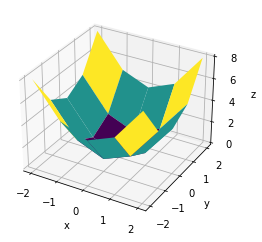

In [11]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

ax.plot_surface(X, Y, Z, cmap='virdis')について注目する。引数、X,Y,Zの形状を確認すると

In [12]:
print("X.shape",X.shape)
print("Y.shape",Y.shape)
print("Z.shape",Z.shape)

X.shape (5, 5)
Y.shape (5, 5)
Z.shape (5, 5)


$5\times 5$の行列、二次元配列であることがわかる。X,Yはそれぞれの格子の点を意味する。これを他の点に変更すると、

In [13]:
X = np.array([np.arange(0,5) for _ in range(5)])
print(X.shape)

(5, 5)


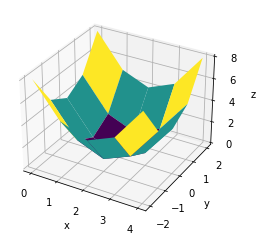

In [14]:
# Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

X軸方向の軸の値が$(-2:2)$から$(0:4)$に変化していることがわかる。

格子点を取る数を増やすことで、より滑らかなグラフを作成することができる。

np.arange()関数を使用することで、$[-2,2]$までの値を0.1刻みで生成する。

In [15]:
np.arange(-2, 2, 0.1)

array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        1.77635684e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00])

この一次元配列をnp.meshgrid()を使用することで、格子点用の二次元配列が生成される。

In [16]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)

np.meshgrid(xs, ys)

[array([[-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        ...,
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9]]),
 array([[-2. , -2. , -2. , ..., -2. , -2. , -2. ],
        [-1.9, -1.9, -1.9, ..., -1.9, -1.9, -1.9],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ 1.7,  1.7,  1.7, ...,  1.7,  1.7,  1.7],
        [ 1.8,  1.8,  1.8, ...,  1.8,  1.8,  1.8],
        [ 1.9,  1.9,  1.9, ...,  1.9,  1.9,  1.9]])]

再度、グラフのプロットに使用するための一次元配列と、二次元配列の形状について確認をするとこのようになる。

In [17]:
print("xs.shape",xs.shape)
print("ys.shape",ys.shape)
print("X.shape",X.shape)
print("Y.shape",Y.shape)

xs.shape (40,)
ys.shape (40,)
X.shape (40, 40)
Y.shape (40, 40)


これらを使用して滑らかなグラフをプロットすると次のようになる。

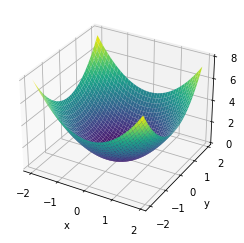

In [18]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### 3.3.2 等高線の描画

plot_surface()は関数の曲面を描画していた。等高線の描画には、contour()関数を使用する。

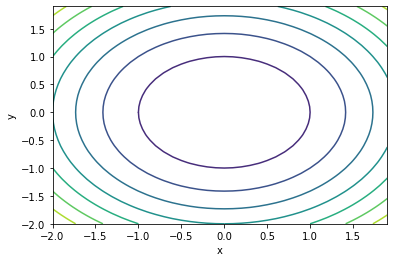

In [19]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

得られる点の数が少ない時にどのように表示されるか気になるので、試してみる。

具体的には、数値の幅を大きくする。

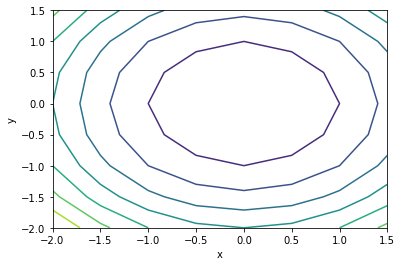

In [20]:
x = np.arange(-2, 2, 0.5)
y = np.arange(-2, 2, 0.5)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

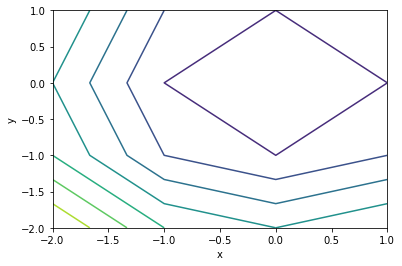

In [21]:
x = np.arange(-2, 2, 1)
y = np.arange(-2, 2, 1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

直線で点を結んでいることがわかった。

### 3.3.3 二次元正規分布のグラフ

二次元正規分布を可視化する。多次元正規分布の式は、

$$\mathcal{N}(\boldsymbol{x};\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^2|\Sigma|}}\exp{-\frac{1}{2}(x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})}$$

と表される。コードは次のようになる。

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(x, mu, cov):#二次元正規分布の関数（多次元）
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

mu = np.array([0.5, -0.2])          #平均の分布
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])        # 分散

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

描画する前に、再度各変数について確認する。

In [23]:
print("mu.shape", mu.shape)
print("cov.shape", cov.shape)

print("mu\n" , mu)
print("cov\n", cov)

mu.shape (2,)
cov.shape (2, 2)
mu
 [ 0.5 -0.2]
cov
 [[2.  0.3]
 [0.3 0.5]]


前のステップを確認すると、二次の正規分布の場合、平均は一次元のベクトルでサイズは$(2,)$、分散行列のサイズは$2\times 2$であり一致していることがわかる。

作成した、二次元の正規分布をプロットすると次のようになる。

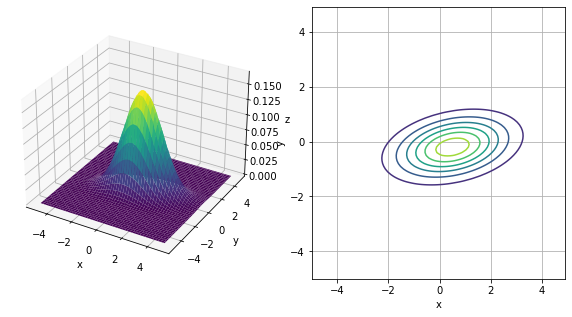

In [24]:
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

fig.add_subplot()関数を使用して、複数のグラフを同時に描画している。

subplotを使用することで、行方向、列方向の分割数とその位置を指定してプロットすることができる。

平均値muを確認すると、$(0.5,-0.2)$であり、山の頂上がその位置にあることがわかる。

試しにその位置を$(0,2)$とすると

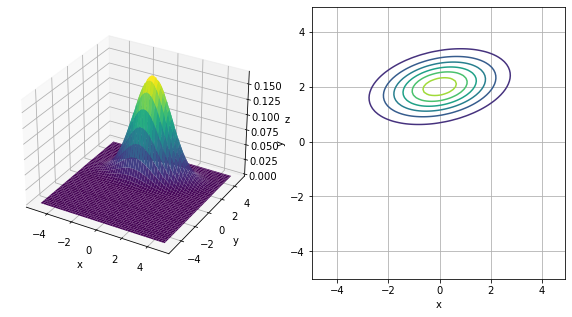

In [25]:
mu = np.array([0, 2])          #平均の分布
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])        # 分散

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)
        
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

ピークの位置が$(0,2)$に移動していることがわかる。また、分散は

cov[0,0]がx方向、cov[1,1]がy方向の分散を意味する。cov[0,1],cov[1,0]はx,yの共分散を表す。分散行列は、対角行列である必要があるため、共分散には、同じ値を設定する。

試しに、x方向の分散を大きくし、y方向の分散を小さくした場合（cov[0,0]=3, cov[1,1]=0.1）の結果をプロットすると次のようになる。

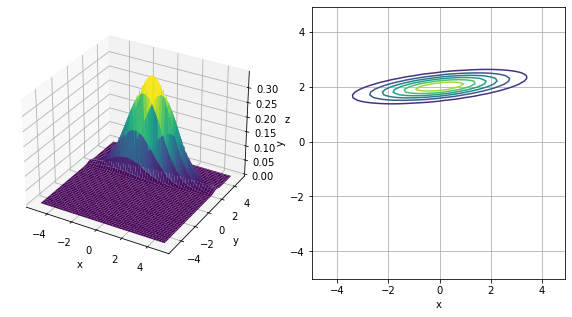

In [26]:
mu = np.array([0, 2])          #平均の分布
cov = np.array([[3.0, 0.3],
                [0.3, 0.1]])        # 分散

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)
        
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

先ほどのプロットと比較してx方向に分布が広がり、y方向の分布は広がりが小さくなっていることがわかる。続いて、共分散の要素を変更した場合について二次元正規分布をプロットする。

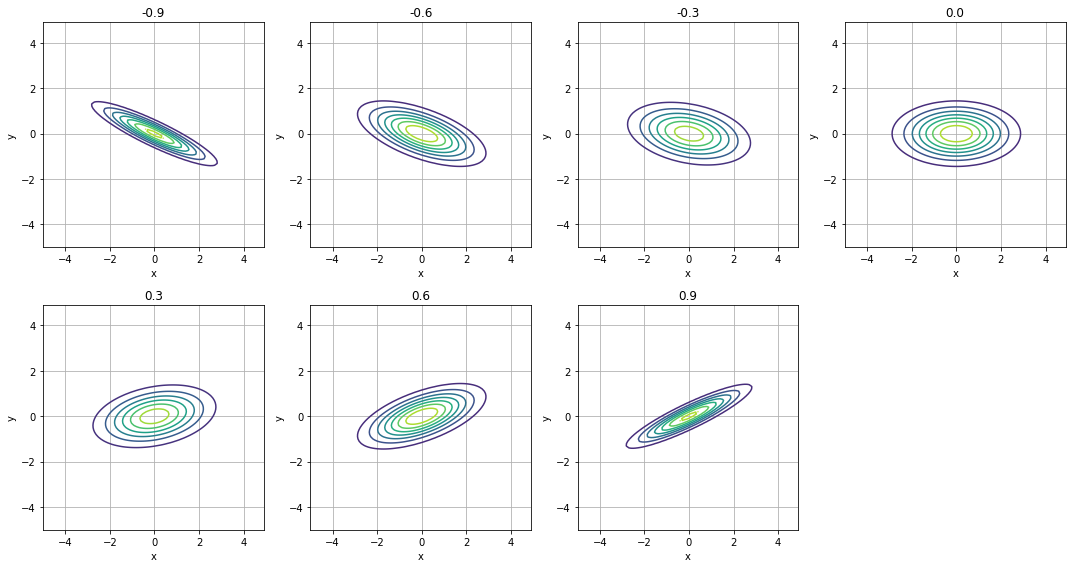

In [27]:
mu = np.array([0, 0])          #平均の分布

co_sigma = np.array([-0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9])

covs = np.array([np.array([[2.0, c],
                [c, 0.5]]) for c in co_sigma])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

cov_counter = 0
fig = plt.figure(figsize=[15,8])
for cov in covs:
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])
            Z[i, j] = multivariate_normal(x, mu, cov)
        
    cov_counter += 1
    ax = fig.add_subplot(2, 4, cov_counter)
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.contour(X, Y, Z)
    plt.title(co_sigma[cov_counter -1])
plt.tight_layout() #複数画像をプロットする際に、重なりを避けられる魔法の呪文
plt.show()

共分散の値が大きくなるにつれて、傾いていることがわかる。つまり、x軸方向に対する傾きだとわかる。

## 3.4 多次元正規分布の最尤推定

多次元の正規分布を対象に最尤推定を行う。

ちなみに、最尤推定はサンプルの平均と分散を計算することで、得られたサンプルの分布に近い正規分布を生成することである。

### 3.4.1 最尤推定を行う

まずは、$D$次元のベクトル$x$の正規分布の式を示す。$\mu$は平均ベクトル、$\Sigma$は共分散行列を意味する。

$$\mathcal{N}(\boldsymbol{x};\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^2|\Sigma|}}\exp{-\frac{1}{2}(x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})}$$

この正規分布からサンプル$\mathcal{D} = {x^{(1)},x^{(2)},\cdots,x^{(N)}}$が得られる確率は

$$p(\mathcal{D},\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \mathcal{N}(x^{(1)};\boldsymbol(\mu), \boldsymbol{\Sigma})\mathcal{N}(x^{(2)};\boldsymbol(\mu), \boldsymbol{\Sigma})\cdots\mathcal{N}(x^{(N)};\boldsymbol(\mu), \boldsymbol{\Sigma}) = \prod^N_{n=1}\mathcal{N}(x^{(n)};\boldsymbol(\mu), \boldsymbol{\Sigma})$$

と表すことができる。この確率$p(\mathcal{D},\boldsymbol{\mu}, \boldsymbol{\Sigma})$は尤度とも呼ばれる。最尤推定では、尤度を最大にするパラメータ$\boldsymbol{\mu},\boldsymbol{\Sigma}$を求める。計算を容易にするため、尤度の対数をとり,$L(\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \log p(\mathcal{D},\boldsymbol{\mu}, \boldsymbol{\Sigma})$を対象に最大値を求める。最大値は、勾配が０の場合であるため

$$ \frac{\partial L}{\partial \boldsymbol{\mu}} = 0, \frac{\partial L }{\partial \boldsymbol{\Sigma}} = 0$$

を使用することで求めることができる。各要素について記述すると、以下のようになる。

$$\boldsymbol{\mu} = \begin{pmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_D \end{pmatrix}$$

$$\boldsymbol{\Sigma} = \begin{pmatrix} \sigma_{11} & \cdots & \sigma_{1i} & \cdots & \sigma_{1D} \\
                                        \vdots      & \ddots &             &        & \vdots      \\
                                        \sigma_{i1} & \cdots & \sigma_{ii} & \cdots & \sigma_{iD} \\
                                        \vdots      &        &             & \ddots & \vdots      \\
                                        \sigma_{D1} & \cdots & \sigma_{Di} & \cdots & \sigma_{DD} \\
                                     \end{pmatrix}$$

$$\frac{\partial L}{\partial \boldsymbol{\mu}} = \begin{pmatrix} \frac{\partial L}{\partial \mu_1} \\
                                                                 \frac{\partial L}{\partial \mu_2} \\
                                                                 \vdots \\
                                                                 \frac{\partial L}{\partial \mu_D} \\
                                                                 \end{pmatrix}$$

$$\frac{\partial L}{\partial \boldsymbol{\Sigma}} = 
\begin{pmatrix}
\frac{\partial L}{\partial \sigma_{11}} & \cdots & \frac{\partial L}{\partial \sigma_{1i}} & \cdots & \frac{\partial L}{\partial \sigma_{1D}} \\
\vdots                                  & \ddots &                                         &        & \vdots                                  \\
\frac{\partial L}{\partial \sigma_{i1}} & \cdots & \frac{\partial L}{\partial \sigma_{ii}} & \cdots & \frac{\partial L}{\partial \sigma_{iD}} \\
\vdots                                  &        &                                         & \ddots & \vdots                                  \\
\frac{\partial L}{\partial \sigma_{D1}} & \cdots & \frac{\partial L}{\partial \sigma_{Di}} & \cdots & \frac{\partial L}{\partial \sigma_{DD}} \\
\end{pmatrix}$$

式$ \frac{\partial L}{\partial \boldsymbol{\mu}} = 0, \frac{\partial L }{\partial \boldsymbol{\Sigma}} = 0$は、一次元の正規分布と同様に解析的に解くことができる。

対数尤度$L(\boldsymbol{\mu}, \boldsymbol{\Sigma})$を展開すると

$$L(\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \log \prod^N_{n=1}\mathcal{N}(x^{(n)};\boldsymbol(\mu), \boldsymbol{\Sigma}) \\ = \sum ^N_{n=1} \log \mathcal{N}(x^{(n)};\boldsymbol(\mu), \boldsymbol{\Sigma}) \\
= \sum ^N_{n=1}\log \left( \frac{1}{\sqrt{(2\pi)^2|\Sigma|}}\exp{-\frac{1}{2}(x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})} \right) \\
= \sum ^N_{n=1}\log \frac{1}{\sqrt{(2\pi)^2|\Sigma|}} + \sum ^N_{n=1} \log \exp{ \left\{ -\frac{1}{2}(x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}) \right\}} \\
= N \log \frac{1}{\sqrt{(2\pi)^2|\Sigma|}} + \sum ^N_{n=1} \left\{ -\frac{1}{2}(x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right\} \\
= -\frac{N}{2}\log(2\pi)^D -\frac{N}{2}\log |\Sigma| -\frac{1}{2}\sum ^N_{n=1} (x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})
$$

となる。ここで、二次形式$\boldsymbol{z}^\top\boldsymbol{A}\boldsymbol{z}$の形に注目する。$\boldsymbol{z}$の形状が$(D,1)$であり、$\boldsymbol{A}$の形状が$(D\times D)$であるとすると二次形式はスカラになる。$\boldsymbol{A}$の要素を$a_{ij}$で表すとすると、行列$\boldsymbol{A}$

$$ A = \begin{pmatrix} 
       a_{11} & \cdots & a_{1i} & \cdots & a_{1D} \\
       \vdots & \ddots &        &        & \vdots \\
       a_{i1} & \cdots & a_{ii} & \cdots & a_{iD} \\
       \vdots &        &        & \ddots & \vdots \\
       a_{D1} & \cdots & a_{Di} & \cdots & a_{DD} \\
       \end{pmatrix}$$
       
である。この時の$\boldsymbol{z}^\top\boldsymbol{A}\boldsymbol{z}$は

$$\boldsymbol{z}^\top\boldsymbol{A}\boldsymbol{z}  = \boldsymbol{z}^\top(\boldsymbol{A}\boldsymbol{z}) \\
                                                   = \sum ^D_{i=1} z_i\left( \sum ^D_{j=1} a_{ij}z_j \right) \\
                                                   = \sum ^D_{i=1} \sum ^D_{j=1} a_{ij}z_iz_j
$$

次に、$\boldsymbol{z}$に関する微分を求める。

$$ \frac{\partial}{\partial z_k}(\boldsymbol{z}^\top\boldsymbol{A}\boldsymbol{z}) = \frac{\partial}{\partial z_k}\left( \sum ^D_{i=1} \sum ^D_{j=1} a_{ij}z_iz_j \right)$$

積の微分法を用いて

$$
 = \sum ^D_{i=1} \sum ^D_{j=1} a_{ij} \left( \frac{\partial z_i}{\partial z_k} \right)z_j + \sum ^D_{i=1} \sum ^D_{j=1} a_{ij} a_{ij} z_i \left(\frac{\partial z_j}{\partial z_k}\right) \\
$$

$z_k$以外の項の微分は0になる。よって

$$
　　= \sum ^D_{j=1} a_{kj}z_j + \sum ^D_{i=1}a_{ik}z_{i} \\
 = (\boldsymbol{A}\boldsymbol{z})_k + (\boldsymbol{A}^\top \boldsymbol{z})_k \\
 = (\boldsymbol{A}\boldsymbol{z} + \boldsymbol{A}^\top \boldsymbol{z})_k
$$

$\boldsymbol{A}$が対称行列$A=A^\top$である場合、

$$\frac{\partial}{\partial z}(\boldsymbol{z}^\top\boldsymbol{A}\boldsymbol{z}) = (\boldsymbol{A} + \boldsymbol{A}^\top)\boldsymbol{z} = 2\boldsymbol{A}\boldsymbol{z}$$

となる。$\boldsymbol{\Sigma}^{-1}$は対称行列なので、同様に次の式が得られる。

$$\frac{\partial}{\partial z}(\boldsymbol{z}^\top\boldsymbol{\Sigma^{-1}}\boldsymbol{z}) =  2\boldsymbol{\Sigma^{-1}}\boldsymbol{z}$$

$z = \boldsymbol{x} - \boldsymbol{\mu}$とすることで、次の式が得られる。

$$\frac{\partial}{\partial \mu}((x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})) 
= \frac{\partial }{\partial \boldsymbol{\mu}}(\boldsymbol{z}^\top\boldsymbol{\Sigma^{-1}}\boldsymbol{z})\\
= \frac{\partial \boldsymbol{z}}{\partial \boldsymbol{\mu}}(\boldsymbol{z}^\top\boldsymbol{\Sigma^{-1}}\boldsymbol{z}) \\
= -\boldsymbol{I}2\Sigma^{-1}\boldsymbol{z} \\
= -2\Sigma^{-1}(\boldsymbol{x} - \boldsymbol{\mu})
$$

連鎖律

$$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial z} \frac{\partial z}{\partial x}$$

を使用すると（この呼び名知らなかった。$\frac{\partial \boldsymbol{z}}{\partial \boldsymbol{\mu}}$の$ij$要素は次のように表される。

$$\left( \frac{\partial \boldsymbol{z}}{\partial \boldsymbol{\mu}}\right)_{ij} = \frac{\partial z_i}{\partial \mu_j}$$

$z = \boldsymbol{x}-\boldsymbol{\mu}$の時、$\frac{\partial \boldsymbol{z}}{\partial \boldsymbol{\mu}} = -\boldsymbol{I}$となる。

$$\frac{\partial}{\partial \mu}((x-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})) = -2\Sigma^{-1}(\boldsymbol{x} - \boldsymbol{\mu})$$

$\Sigma$の最尤推定を求める。

$$L(\boldsymbol{\mu}, \boldsymbol{\Sigma}) = -\frac{N}{2}\log(2\pi)^D - \frac{N}{2}\log|\Sigma|-\frac{1}{2}\sum^N_{n=1} (\boldsymbol{x}^{(n)}-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}^{(n)}-\boldsymbol{\mu})$$

$$\frac{\partial L}{\partial \Sigma} = -\frac{N}{2}\frac{\partial}{\partial \boldsymbol{\Sigma}} \log|\Sigma|-\frac{1}{2}\sum^N_{n=1}(\boldsymbol{x}^{(n)}-\mu)^\top\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}^{(n)}-\boldsymbol{\mu})$$

そして、$\frac{\partial L}{\partial \boldsymbol{\Sigma}} = 0$として、次の式が得られる。

$$
\frac{N}{2}(\Sigma^{-1})^\top+\frac{1}{2}(\boldsymbol{\Sigma}^{-1}\boldsymbol{S}\boldsymbol{\Sigma^{-1}})^\top=0 \\
N(\boldsymbol{\Sigma}^{-1})^\top = (\boldsymbol{\Sigma}^{-1}\boldsymbol{S}\boldsymbol{\Sigma^{-1}})^\top \\
N(\boldsymbol{\Sigma}^{-1}) = \boldsymbol{\Sigma}^{-1}\boldsymbol{S}\boldsymbol{\Sigma^{-1}} \\
N\boldsymbol{I} = \boldsymbol{S}\boldsymbol{\Sigma}^{-1}\\
\Sigma = \frac{1}{N}\boldsymbol{S}
$$

よって

$$\Sigma = \frac{1}{N}\sum^N_{n=1}(\boldsymbol{x}^{(n)}-\mu)^\top(\boldsymbol{x}^{(n)}-\boldsymbol{\mu})$$

ここで、$\boldsymbol{\mu}$は$\mu=\hat{\mu}$を使用するため、

$$\Sigma = \frac{1}{N}\sum^N_{n=1}(\boldsymbol{x}^{(n)}-\mu)^\top(\boldsymbol{x}^{(n)}-\boldsymbol{\hat{\mu}})$$

結果、

$$\frac{1}{N}\sum^{N}_{n=1}x^{(n)}$$
$$\Sigma = \frac{1}{N}\sum^N_{n=1}(\boldsymbol{x}^{(n)}-\mu)^\top(\boldsymbol{x}^{(n)}-\boldsymbol{\hat{\mu}})$$

となる。

### 3.4.2 最尤推定の実装

最尤推定の実装を行う。

In [28]:
import numpy as np

np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D)

mu = np.sum(xs, axis=0)
mu /= N

cov = 0

for n in range(N):
    x = xs[n]
    z = x - mu
    z = z[:, np.newaxis]
    cov += z @ z.T
    
cov /+ N

print(mu)
print(cov)

[0.49443495 0.49726356]
[[847.6318949   -2.31275072]
 [ -2.31275072 839.46563127]]


一様分布からの乱数をD個サンプリングしこのデータに関して最尤推定を行った。最適なパラメータであるmuとcovを得ますNumPyを使用して計算すると

In [29]:
mu  = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


### 3.4.3 実データを使う

実際のデータを使用して多次元正規分布の最尤推定を行う。

前回は、身長のデータのみを使用していたが、身長と体重のデータを使用することで、二次元データとする。

(25000, 2)


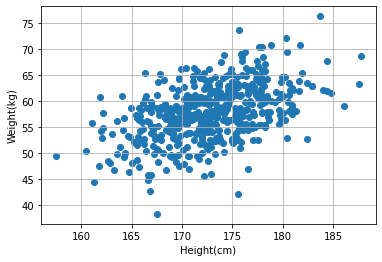

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.join('height_weight.txt')
xs = np.loadtxt(path)

print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.grid()
plt.show()

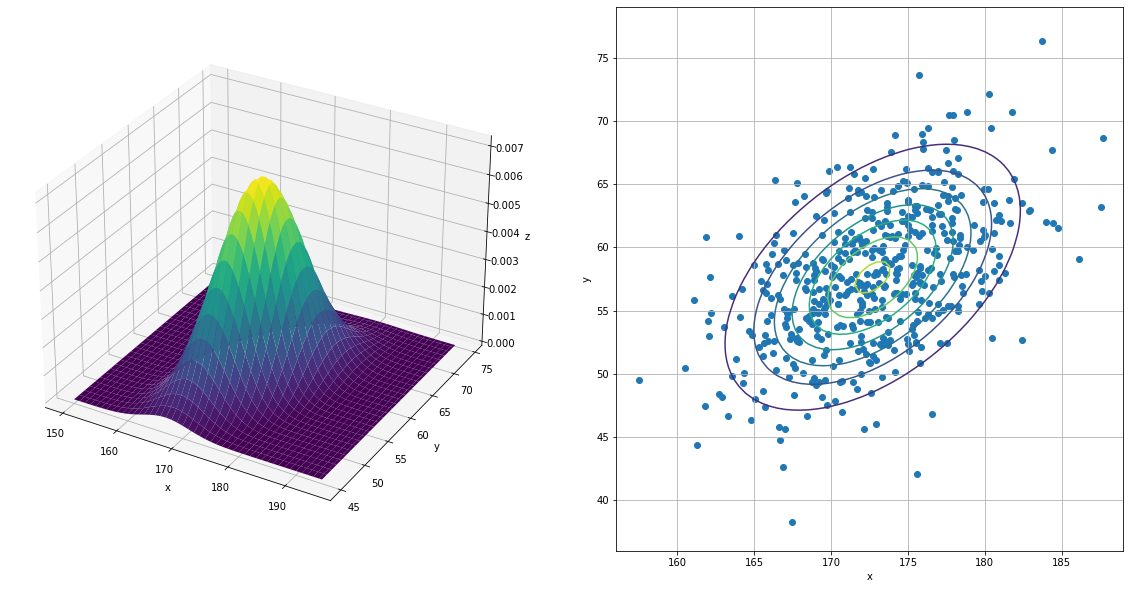

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.join('height_weight.txt')
xs = np.loadtxt(path)

# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=[20,10])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.grid()
plt.show()